<table align="left">
  <td>
    <a href="https://is.gd/JjkDfn" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Exercício 2

Queremos construir uma caixa cujo comprimento da base é 3 vezes a largura. Os materiais utilizados para construir a base e o fundo custam 10 reais/metro2 e os materiais utilizados para construir os lados custam 6 reais/metro2. Se a caixa deve ter um volume de 50 metros3, determine as dimensões que minimizarão o custo para construir a caixa.

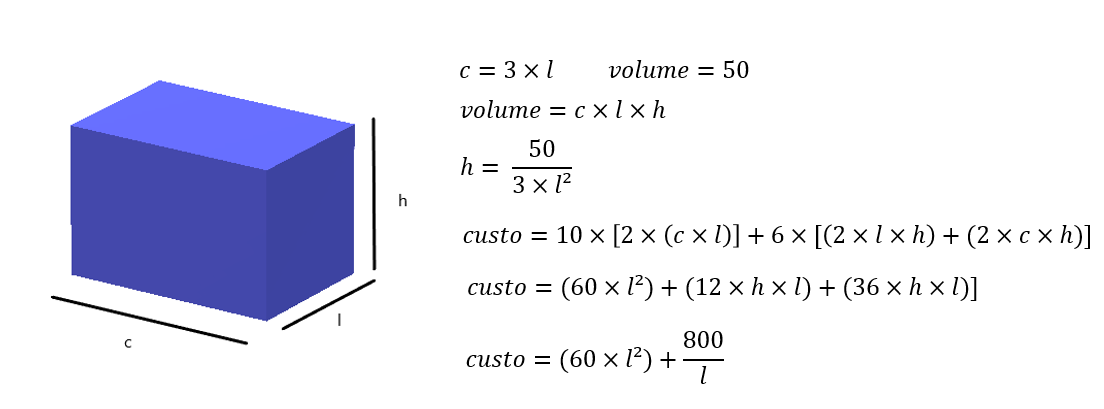

## Instalar pacote DEAP

In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 5.0 MB/s 


# Importar bibliotecas necessárias

In [ ]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import operator
import random
import numpy
import math

## Partícula

part = [l]

   - **l**: largura
   
   
**Observação:** comprimento = 3 * largura

**Observação:** altura = 50/(3 * largura)

# Função objetivo

   - Função objetivo com objetivo de minimizar o custo

In [ ]:
def objective_function(individual):
    custo = 60*(individual[0]**2) + (800/individual[0])
    return custo,

# Restrição do problema


   - Verificar partícula - restrições impostas as partículas
       - Mínimo = 0, Máximo = 50

In [ ]:
def feasible(individual):
    if individual[0] < 0:
        return False
    if individual[0] > 50:
      return False
    return True

## Criando a função de Minimização e a estrutura da partícula

In [ ]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser -1.0 para esse caso (função de minimização)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)

## Definindo uma função para gerar a partícula

In [ ]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [ ]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [ ]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=1, pmin=0, pmax=50, smin=-2, smax=2)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 100000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [ ]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [ ]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [ ]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [ ]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [ ]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg    	std    	min    	max   
0  	100  	57082.8	44845.1	670.976	146059
1  	100  	50710.8	41631.5	637.651	134459
2  	100  	44834.2	38417.5	642.014	123339
3  	100  	39366.5	35299.6	641.264	112699
4  	100  	1.03444e+06	9.94646e+06	637.636	1e+08 
5  	100  	3.02988e+06	1.70535e+07	651.92 	1e+08 
6  	100  	3.02579e+06	1.70542e+07	641.612	1e+08 
7  	100  	3.02216e+06	1.70548e+07	639.705	1e+08 
8  	100  	2.01888e+06	1.39973e+07	637.622	1e+08 
9  	100  	3.01667e+06	1.70558e+07	638.153	1e+08 
10 	100  	2.01326e+06	1.39981e+07	637.597	1e+08 
11 	100  	4.0118e+06 	1.95935e+07	637.599	1e+08 
12 	100  	5.00889e+06	2.17925e+07	637.597	1e+08 
13 	100  	1.1007e+07 	3.12865e+07	637.597	1e+08 
14 	100  	8.00591e+06	2.71276e+07	637.597	1e+08 
15 	100  	1.00554e+06	9.94932e+06	637.728	1e+08 
16 	100  	3.00415e+06	1.7058e+07 	637.597	1e+08 
17 	100  	6.00269e+06	2.3748e+07 	637.639	1e+08 
18 	100  	6.00309e+06	2.37479e+07	637.595	1e+08 
19 	100  	9.00179e+06	2.86176e+07	637.597	1e+08 
20 	100  	8

## Melhor indivíduo

In [ ]:
print('Largura: ', best[0])
print('Comprimento: ', best[0]*3)
print('Altura: ', (50/(3*(best[0]**2))))

Largura:  1.882078378962556
Comprimento:  5.646235136887668
Altura:  4.705148538561877


## Avaliação do melhor indivíduo

In [ ]:
feasible(best)

True

In [ ]:
print('Custo: ',objective_function(best)[0])

Custo:  637.595141516759


In [ ]:
print('Volume: ', best[0]*best[0]*3*(50/(3*(best[0]**2))))

Volume:  50.0
